# import libraries

In [4]:
pip install swig

In [5]:
pip install "gymnasium[all]"

# A. cliff walking environment

## A.1) monte-carlo first visit code

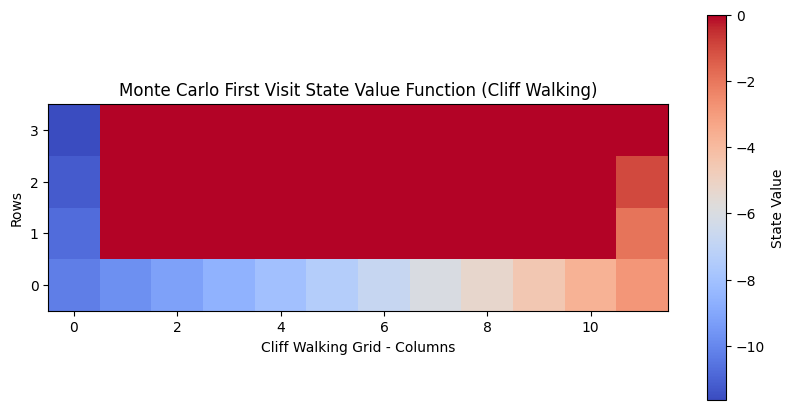

array([[-10.24650042,  -9.73315833,  -9.19279825,  -8.62399815,
         -8.02526122,  -7.39501181,  -6.73159137,  -6.03325408,
         -5.29816219,  -4.52438125,  -3.709875  ,  -2.8525    ],
       [-10.7341754 ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.95      ],
       [-11.19746663,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.        ],
       [-11.6375933 ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ]])

In [77]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# helper functions
# -------------------------------
# helper function to get action given an observation
def get_action(s, policy):
  row = s // 12
  col = s % 12
  return policy[row][col]

# sample an episode
def sample_episode(env, policy):
  # this function should return this
  episode = []

  s, info = env.reset()
  episode_over = False
  while not episode_over:
      # choose an action to perform according to current policy
      action = get_action(s, policy)
      # see what environment returns
      s_next, reward, terminated, truncated, info = env.step(action)
      episode.append((s, action, reward, s_next))

      episode_over = terminated or truncated
      s = s_next

  return episode

# -------------------------------
# monte carlo first visit
# -------------------------------
def monte_carlo_first_visit(env, policy, discount_factor, num_episodes):
  # initializations
  values = np.zeros(env.observation_space.n)
  n_s = np.zeros(env.observation_space.n)

  for episode_no in range(num_episodes):
    # 1. sample an episode
    sequence = sample_episode(env, policy)
    visited = [-1] * env.observation_space.n # keeps track if state is visited in this sequence or not
    for i in range(len(sequence)):
      # 2. see if the state in this step has been visited before or not
      state = sequence[i][0]
      if visited[state] == -1:
        # 3. compute the return
        G = sequence[i][2]  # add immediate reward
        power = 1
        for j in range(i+1, len(sequence)):
          # discount all the subsequent rewards
          G += (discount_factor**power)*sequence[j][2]
          power += 1

        # 4. apply monte carlo evaluation step
        n_s[state] += 1
        values[state] = values[state] + 1/n_s[state]*(G - values[state])
        visited[state] = 1

  # Reshape the final values into a 4x12 grid
  grid_values = values.reshape(4, 12)

  # Plot the values as a heatmap
  plt.figure(figsize=(10, 5))
  plt.imshow(grid_values, cmap="coolwarm", interpolation="nearest", origin='lower')
  plt.colorbar(label="State Value")
  plt.title("Monte Carlo First Visit State Value Function (Cliff Walking)")
  plt.xlabel("Cliff Walking Grid - Columns")
  plt.ylabel("Rows")
  plt.show()

  return grid_values

# -------------------------------
# example usage - monte carlo first visit
# -------------------------------
# inputs to algorithm
env = gym.make('CliffWalking-v0')
# Define the deterministic policy and action names
policy = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
]

discount_factor = 0.95
num_episodes = 500000

monte_carlo_first_visit(env, policy, discount_factor, num_episodes)

## A.2) monte carlo every visit

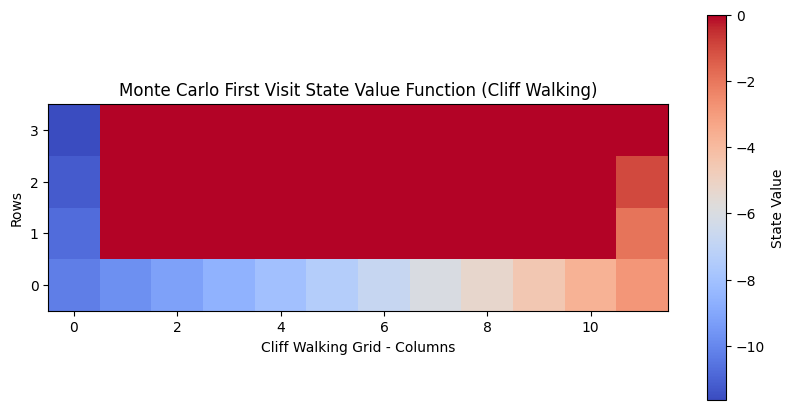

array([[-10.24650042,  -9.73315833,  -9.19279825,  -8.62399815,
         -8.02526122,  -7.39501181,  -6.73159137,  -6.03325408,
         -5.29816219,  -4.52438125,  -3.709875  ,  -2.8525    ],
       [-10.7341754 ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.95      ],
       [-11.19746663,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.        ],
       [-11.6375933 ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ]])

In [78]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# helper functions
# -------------------------------
# helper function to get action given an observation
def get_action(s, policy):
  row = s // 12
  col = s % 12
  return policy[row][col]

# sample an episode
def sample_episode(env, policy):
  # this function should return this
  episode = []

  s, info = env.reset()
  episode_over = False
  while not episode_over:
      # choose an action to perform according to current policy
      action = get_action(s, policy)
      # see what environment returns
      s_next, reward, terminated, truncated, info = env.step(action)
      episode.append((s, action, reward, s_next))

      episode_over = terminated or truncated
      s = s_next

  return episode

# -------------------------------
# monte carlo every visit
# -------------------------------
def monte_carlo_every_visit(env, policy, discount_factor, num_episodes):
  # initializations
  values = np.zeros(env.observation_space.n)
  n_s = np.zeros(env.observation_space.n)

  for episode_no in range(num_episodes):
    # 1. sample an episode
    sequence = sample_episode(env, policy)
    for i in range(len(sequence)):
      state = sequence[i][0]
      # 2. compute the return
      G = sequence[i][2]  # add immediate reward
      power = 1
      for j in range(i+1, len(sequence)):
        # discount all the subsequent rewards
        G += (discount_factor**power)*sequence[j][2]
        power += 1

      # 3. apply monte carlo evaluation step
      n_s[state] += 1
      values[state] = values[state] + 1/n_s[state]*(G - values[state])

  # Reshape the final values into a 4x12 grid
  grid_values = values.reshape(4, 12)

  # Plot the values as a heatmap
  plt.figure(figsize=(10, 5))
  plt.imshow(grid_values, cmap="coolwarm", interpolation="nearest", origin='lower')
  plt.colorbar(label="State Value")
  plt.title("Monte Carlo First Visit State Value Function (Cliff Walking)")
  plt.xlabel("Cliff Walking Grid - Columns")
  plt.ylabel("Rows")
  plt.show()

  return grid_values

# -------------------------------
# example usage - monte carlo first visit
# -------------------------------
# inputs to algorithm
env = gym.make('CliffWalking-v0')
# Define the deterministic policy and action names
policy = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
]

discount_factor = 0.95
num_episodes = 500000

monte_carlo_every_visit(env, policy, discount_factor, num_episodes)

## A.3) Td-0

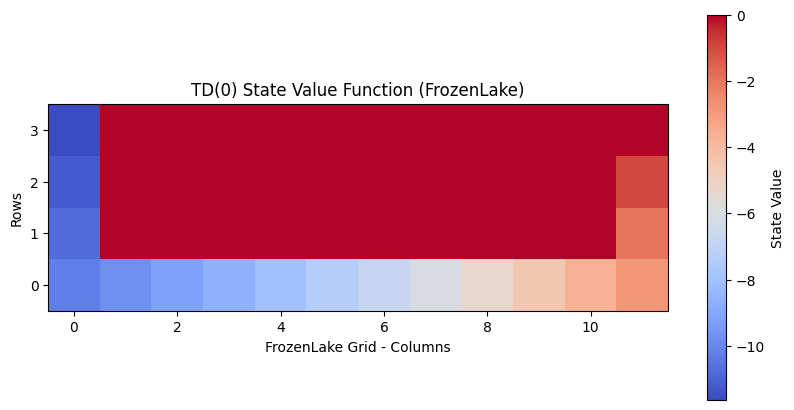

array([[-10.24650042,  -9.73315833,  -9.19279825,  -8.62399815,
         -8.02526122,  -7.39501181,  -6.73159137,  -6.03325408,
         -5.29816219,  -4.52438125,  -3.709875  ,  -2.8525    ],
       [-10.7341754 ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.95      ],
       [-11.19746663,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.        ],
       [-11.6375933 ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ]])

In [80]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# helper functions
# -------------------------------
def get_action(s, policy):
    row = s // 12
    col = s % 12
    return policy[row][col]

# Td(0) algorithm
def td_0(env, policy, discount_factor, alpha, num_episodes):
    # instead of sampling a complete episode, in td0, i'll sample a step and
    # then apply the td update
    values = np.zeros(env.observation_space.n)

    for episode_no in range(num_episodes):
        s, info = env.reset()
        episode_over = False

        while not episode_over:
            action = get_action(s, policy)
            s_next, reward, terminated, truncated, info = env.step(action)

            # TD(0) update step
            values[s] = values[s] + alpha * (reward + discount_factor * values[s_next] - values[s])

            s = s_next
            episode_over = terminated or truncated

    # Reshape the final values into a 4x12 grid
    grid_values = values.reshape(4, 12)

    # Plot the values as a heatmap
    plt.figure(figsize=(10, 5))
    plt.imshow(grid_values, cmap="coolwarm", interpolation="nearest", origin='lower')
    plt.colorbar(label="State Value")
    plt.title("TD(0) State Value Function (FrozenLake)")
    plt.xlabel("FrozenLake Grid - Columns")
    plt.ylabel("Rows")
    plt.show()

    return grid_values

# -------------------------------
# example usage - td(0)
# -------------------------------
# inputs to algorithm
env = gym.make('CliffWalking-v0')
# Define the deterministic policy and action names
policy = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
]

discount_factor = 0.95
alpha = 0.1
num_episodes = 500000

td_0(env, policy, discount_factor, alpha, num_episodes)


# B. Frozen lake environment

## B.1) first visit monte carlo

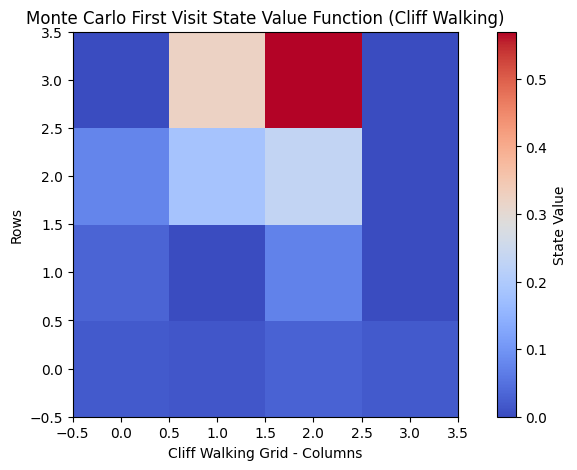

array([[0.01977376, 0.01475336, 0.03066241, 0.01957754],
       [0.03176659, 0.        , 0.07236443, 0.        ],
       [0.07641869, 0.18422085, 0.2320454 , 0.        ],
       [0.        , 0.32219304, 0.56975886, 0.        ]])

In [71]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# helper functions
# -------------------------------
# helper function to get action given an observation
def get_action(s, policy):
  row = s // 4
  col = s % 4
  return policy[row][col]

# sample an episode
def sample_episode(env, policy):
  # this function should return this
  episode = []

  s, info = env.reset()
  episode_over = False
  while not episode_over:
      # choose an action to perform according to current policy
      action = get_action(s, policy)
      # see what environment returns
      s_next, reward, terminated, truncated, info = env.step(action)
      episode.append((s, action, reward, s_next))

      episode_over = terminated or truncated
      s = s_next

  return episode

# -------------------------------
# monte carlo first visit
# -------------------------------
def monte_carlo_first_visit(env, policy, discount_factor, num_episodes):
  # initializations
  values = np.zeros(env.observation_space.n)
  n_s = np.zeros(env.observation_space.n)

  for episode_no in range(num_episodes):
    # 1. sample an episode
    sequence = sample_episode(env, policy)
    visited = [-1] * env.observation_space.n # keeps track if state is visited in this sequence or not
    for i in range(len(sequence)):
      # 2. see if the state in this step has been visited before or not
      state = sequence[i][0]
      if visited[state] == -1:
        # 3. compute the return
        G = sequence[i][2]  # add immediate reward
        power = 1
        for j in range(i+1, len(sequence)):
          # discount all the subsequent rewards
          G += (discount_factor**power)*sequence[j][2]
          power += 1

        # 4. apply monte carlo evaluation step
        n_s[state] += 1
        values[state] = values[state] + 1/n_s[state]*(G - values[state])
        visited[state] = 1

  # Reshape the final values into a 4x4 grid
  grid_values = values.reshape(4, 4)

  # Plot the values as a heatmap
  plt.figure(figsize=(10, 5))
  plt.imshow(grid_values, cmap="coolwarm", interpolation="nearest", origin='lower')
  plt.colorbar(label="State Value")
  plt.title("Monte Carlo First Visit State Value Function (Cliff Walking)")
  plt.xlabel("Cliff Walking Grid - Columns")
  plt.ylabel("Rows")
  plt.show()

  return grid_values

# -------------------------------
# example usage - monte carlo first visit
# -------------------------------
# inputs to algorithm
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

# Define the deterministic policy and action names
policy = [
    [1, 1, 1, 0],
    [1, -1, 1, -1],
    [1, 1, 1, -1],
    [-1, 2, 2, -1]
]

discount_factor = 0.95
num_episodes = 500000

monte_carlo_first_visit(env, policy, discount_factor, num_episodes)

## B.2) every visit monte carlo

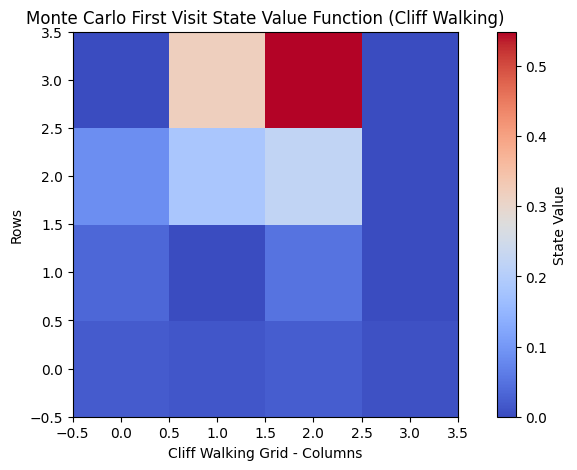

array([[0.02059136, 0.01372529, 0.02185386, 0.00749117],
       [0.03612512, 0.        , 0.05135643, 0.        ],
       [0.08613679, 0.18310515, 0.2217346 , 0.        ],
       [0.        , 0.3183788 , 0.54900117, 0.        ]])

In [75]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# helper functions
# -------------------------------
# helper function to get action given an observation
def get_action(s, policy):
  row = s // 4
  col = s % 4
  return policy[row][col]

# sample an episode
def sample_episode(env, policy):
  # this function should return this
  episode = []

  s, info = env.reset()
  episode_over = False
  while not episode_over:
      # choose an action to perform according to current policy
      action = get_action(s, policy)
      # see what environment returns
      s_next, reward, terminated, truncated, info = env.step(action)
      episode.append((s, action, reward, s_next))

      episode_over = terminated or truncated
      s = s_next

  return episode

# -------------------------------
# monte carlo every visit
# -------------------------------
def monte_carlo_every_visit(env, policy, discount_factor, num_episodes):
  # initializations
  values = np.zeros(env.observation_space.n)
  n_s = np.zeros(env.observation_space.n)

  for episode_no in range(num_episodes):
    # 1. sample an episode
    sequence = sample_episode(env, policy)
    for i in range(len(sequence)):
      state = sequence[i][0]
      # 2. compute the return
      G = sequence[i][2]  # add immediate reward
      power = 1
      for j in range(i+1, len(sequence)):
        # discount all the subsequent rewards
        G += (discount_factor**power)*sequence[j][2]
        power += 1

      # 3. apply monte carlo evaluation step
      n_s[state] += 1
      values[state] = values[state] + 1/n_s[state]*(G - values[state])

  # Reshape the final values into a 4x4 grid
  grid_values = values.reshape(4, 4)

  # Plot the values as a heatmap
  plt.figure(figsize=(10, 5))
  plt.imshow(grid_values, cmap="coolwarm", interpolation="nearest", origin='lower')
  plt.colorbar(label="State Value")
  plt.title("Monte Carlo First Visit State Value Function (Cliff Walking)")
  plt.xlabel("Cliff Walking Grid - Columns")
  plt.ylabel("Rows")
  plt.show()

  return grid_values

# -------------------------------
# example usage - monte carlo first visit
# -------------------------------
# inputs to algorithm
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

# Define the deterministic policy and action names
policy = [
    [1, 1, 1, 0],
    [1, -1, 1, -1],
    [1, 1, 1, -1],
    [-1, 2, 2, -1]
]

discount_factor = 0.95
num_episodes = 500000

monte_carlo_every_visit(env, policy, discount_factor, num_episodes)

## B.3) Td(0) evaluation

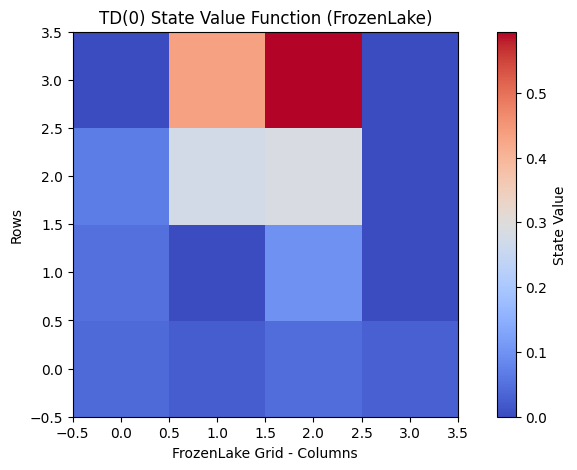

array([[0.03976876, 0.02378557, 0.04576065, 0.02919357],
       [0.0489773 , 0.        , 0.09828819, 0.        ],
       [0.06815413, 0.27610192, 0.28624515, 0.        ],
       [0.        , 0.43223431, 0.59431906, 0.        ]])

In [79]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# helper functions
# -------------------------------
def get_action(s, policy):
    row = s // 4
    col = s % 4
    return policy[row][col]

# Td(0) algorithm
def td_0(env, policy, discount_factor, alpha, num_episodes):
    # instead of sampling a complete episode, in td0, i'll sample a step and
    # then apply the td update
    values = np.zeros(env.observation_space.n)

    for episode_no in range(num_episodes):
        s, info = env.reset()
        episode_over = False

        while not episode_over:
            action = get_action(s, policy)
            s_next, reward, terminated, truncated, info = env.step(action)

            # TD(0) update step
            values[s] = values[s] + alpha * (reward + discount_factor * values[s_next] - values[s])

            s = s_next
            episode_over = terminated or truncated

    # Reshape the final values into a 4x4 grid
    grid_values = values.reshape(4, 4)

    # Plot the values as a heatmap
    plt.figure(figsize=(10, 5))
    plt.imshow(grid_values, cmap="coolwarm", interpolation="nearest", origin='lower')
    plt.colorbar(label="State Value")
    plt.title("TD(0) State Value Function (FrozenLake)")
    plt.xlabel("FrozenLake Grid - Columns")
    plt.ylabel("Rows")
    plt.show()

    return grid_values

# -------------------------------
# example usage - td(0)
# -------------------------------
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

# Define the deterministic policy and action names
policy = [
    [1, 1, 1, 0],
    [1, -1, 1, -1],
    [1, 1, 1, -1],
    [-1, 2, 2, -1]
]

discount_factor = 0.95
alpha = 0.1
num_episodes = 500000

td_0(env, policy, discount_factor, alpha, num_episodes)
